Explore Chest X-Ray Data to get an idea of what we need to do to it before training.

In [16]:
# import packages
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [3]:
# Read Training Labels, we do not have Testing Labels so we need to use a piece of Training Data as Test Data
df = pd.read_csv("labels_train.csv")

In [4]:
df.head()

,file_name,class_id
0,img_4358977458434011046.jpg,1
1,img_5224016757187192130.jpg,2
2,img_3065202206106254707.jpg,2
3,img_6304894865561547174.jpg,1
4,img_3371338542810939877.jpg,2


In [8]:
# Make sure none of our data is the same
df['file_name'].duplicated().value_counts()

file_name
False    4672
Name: count, dtype: int64

In [9]:
# See how many of each class there is
df['class_id'].value_counts()

class_id
1    2238
0    1227
2    1207
Name: count, dtype: int64

In [11]:
# Class 0: no disease
# Class 1: bacterial pneumonia
# Class 2: viral pneumonia

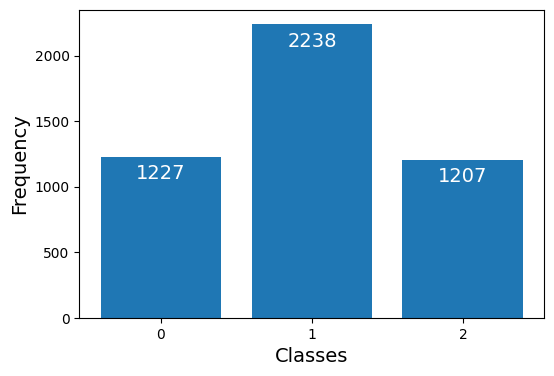

In [14]:
# Plot Frequency
rootdir = "/kaggle/input/chest-xrays-bacterial-viral-pneumonia-normal/"
data = pd.read_csv("labels_train.csv")
labels = data['class_id'].values
freq = [np.sum(labels==i) for i in range(3)]

plt.figure(figsize=(6,4))
plt.bar([0,1,2], freq)
plt.xticks([0,1,2], ['0','1','2'])
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
ax = plt.gca()
rects = ax.patches
for rect, label in zip(rects, freq):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height - 200, label,
            ha='center', va='bottom', fontsize=14, color='white')

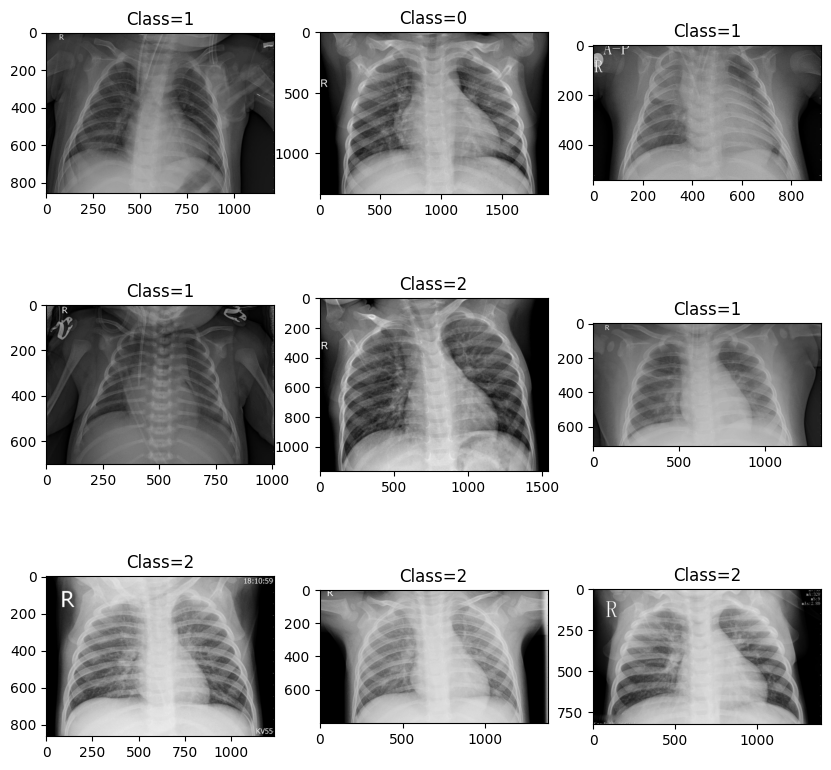

In [18]:
# View Image Data 
# Since images can come in different sizes we will need to make them the same size to keep consistency.
train_dir = os.path.join("train_images/train_images")
filenames = os.listdir(train_dir)
plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(3):
        idx = 3*i+j
        filename = os.path.join(train_dir, filenames[idx+10])
        label = labels[idx+10]
        plt.subplot(3,3,idx+1)
        im = plt.imread(filename, 'jpg')
        plt.imshow(im, cmap=plt.gray())
        plt.title('Class='+str(label))

In [21]:
test_images = []
for dirname, _, filenames in os.walk('test_images/test_images'):
    for filename in filenames:
        print(filename)
        test_images.append(filename)

img_1005556732793955351.jpg
img_1013947992995844467.jpg
img_1037372824298815463.jpg
img_1037910048520457739.jpg
img_1046182996541873496.jpg
img_1055155538793908277.jpg
img_1056493789828791097.jpg
img_1063539320518541645.jpg
img_1067627733181002215.jpg
img_1069295317302009938.jpg
img_1082179150533558647.jpg
img_1084571077180415795.jpg
img_1085919836874816265.jpg
img_1089446545260563550.jpg
img_1102208210595046337.jpg
img_1123863876791783558.jpg
img_1125305094391727652.jpg
img_1128297347845871447.jpg
img_1129866115399804592.jpg
img_1131369692869272887.jpg
img_1135497390116745149.jpg
img_1136104169519514555.jpg
img_113945781825697157.jpg
img_1157894168738052107.jpg
img_1162351550721440578.jpg
img_1193530292025631274.jpg
img_1195977624644538766.jpg
img_1202297022976410281.jpg
img_1207853828423997041.jpg
img_1219280710752744599.jpg
img_1223018896484706644.jpg
img_1223654159476859553.jpg
img_1237663687167431061.jpg
img_1257200206508103767.jpg
img_1260586497798188644.jpg
img_12891481502350166

In [23]:
for image in test_images:
    if image in df['file_name']:
        print(image)

In [ ]:
#There are no test iamges located in the train data